# Parte 3

Aqui foi realizada a modelagem para o Modelo 1, de previsão de longo prazo. O modelo consiste em prever a demanda média, máxima  e mínima em um determinado dia, levando em consideração algumas condições.
Foram testados 3 algoritmos diferentes e realizados alguns testes para encontrar o melhor modelo de cada algoritmo.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime
pd.set_option('display.max_columns', 50)
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_parquet('DadosFinais/df_final.parquet.gzip', engine='pyarrow')

In [3]:
df.head()

,Data,Demanda_Max,Temperatura_Max,Umidade_Max,IAEBR,Atividade Industrial Sem Ajuste Sazonal,População,Com Feriado,Sábado,Domingo,Dia de Semana,Abril,Agosto,Dezembro,Fevereiro,Janeiro,Julho,Junho,Março,Maio,Novembro,Outubro,Setembro,Demanda_Min,Temperatura_Min,Umidade_Min,Demanda_Med,Temperatura_Med,Umidade_Med
0,2006-01-01,3302.0,27.300,90.500000,108.55,91.702366,10530809,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1806.0,20.925000,65.75,2277.530556,23.495903,79.253646
1,2006-01-02,3631.0,27.450,87.500000,108.55,91.702366,10530809,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,2274.0,21.725000,65.00,3045.465278,23.818993,79.031337
2,2006-01-03,3761.0,26.600,82.689583,108.55,91.702366,10530809,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,2560.0,20.716389,61.00,3213.102778,23.469557,74.780208
3,2006-01-04,3856.0,28.875,82.750000,108.55,91.702366,10530809,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,2549.0,20.700000,49.75,3256.781944,23.830365,68.286285
4,2006-01-05,3910.0,28.250,73.500000,108.55,91.702366,10530809,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,2649.0,22.166944,54.25,3314.315900,23.972667,67.117089


### Normalização e divisão dos dados

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [5]:
df.columns

Index(['Data', 'Demanda_Max', 'Temperatura_Max', 'Umidade_Max', 'IAEBR',
       'Atividade Industrial Sem Ajuste Sazonal', 'População', 'Com Feriado',
       'Sábado', 'Domingo', 'Dia de Semana', 'Abril', 'Agosto', 'Dezembro',
       'Fevereiro', 'Janeiro', 'Julho', 'Junho', 'Março', 'Maio', 'Novembro',
       'Outubro', 'Setembro', 'Demanda_Min', 'Temperatura_Min', 'Umidade_Min',
       'Demanda_Med', 'Temperatura_Med', 'Umidade_Med'],
      dtype='object')

In [6]:
X = df[['IAEBR', 'Atividade Industrial Sem Ajuste Sazonal', 'População', 'Com Feriado', 'Domingo', 'Sábado',
                 'Dia de Semana', 'Temperatura_Max', 'Umidade_Max', 'Temperatura_Min', 'Umidade_Min', 'Temperatura_Med',
                   'Umidade_Med','Abril', 'Agosto', 'Dezembro',
       'Fevereiro', 'Janeiro', 'Julho', 'Junho', 'Março', 'Maio', 'Novembro',
       'Outubro', 'Setembro']]
Y = df[['Demanda_Max', 'Demanda_Min', 'Demanda_Med']]

In [7]:
scaler = StandardScaler()
X_std = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

In [8]:
#Dividir entre dataset de treino e teste
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

#Dividir entre dataset de treino e validação
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.25,random_state=0)

#Dividir entre dataset de treino e teste dados normalizados
X_train_std,X_test_std,y_train_std,y_test_std = train_test_split(X_std,Y,test_size=0.25,random_state=0)

#Dividir entre dataset de treino e validação
X_train_std,X_val_std,y_train_std,y_val_std = train_test_split(X_train_std,y_train_std,test_size=0.25,random_state=0)

In [9]:
X_train_std.head()

,IAEBR,Atividade Industrial Sem Ajuste Sazonal,População,Com Feriado,Domingo,Sábado,Dia de Semana,Temperatura_Max,Umidade_Max,Temperatura_Min,Umidade_Min,Temperatura_Med,Umidade_Med,Abril,Agosto,Dezembro,Fevereiro,Janeiro,Julho,Junho,Março,Maio,Novembro,Outubro,Setembro
2561,0.446584,-0.004444,0.202081,-0.19084,-0.408471,2.450024,-1.580829,0.314059,0.745505,0.893788,0.886674,0.977345,0.144848,-0.303046,-0.305978,-0.297125,-0.293384,3.241200,-0.308528,-0.303046,-0.308528,-0.308528,-0.291878,-0.297125,-0.291878
4531,-0.267940,-1.421138,1.111192,-0.19084,-0.408471,-0.408159,0.632580,0.323066,-1.349620,0.070453,-1.310897,0.162285,-1.220405,-0.303046,-0.305978,-0.297125,-0.293384,-0.308528,-0.308528,-0.303046,-0.308528,3.241200,-0.291878,-0.297125,-0.291878
1923,0.505610,0.637665,-0.154579,-0.19084,-0.408471,-0.408159,0.632580,0.449166,-0.525582,0.118494,-0.727471,0.136544,-0.548160,3.299832,-0.305978,-0.297125,-0.293384,-0.308528,-0.308528,-0.303046,-0.308528,-0.308528,-0.291878,-0.297125,-0.291878
3520,0.635052,-0.424634,0.579613,-0.19084,-0.408471,2.450024,-1.580829,0.075369,0.646199,0.027216,-0.299626,-0.026551,-0.381787,-0.303046,3.268214,-0.297125,-0.293384,-0.308528,-0.308528,-0.303046,-0.308528,-0.308528,-0.291878,-0.297125,-0.291878
280,-1.623465,0.287218,-1.649184,-0.19084,2.448155,-0.408159,-1.580829,-0.338960,-0.176466,-0.318682,-0.571891,-0.440370,-0.467766,-0.303046,-0.305978,-0.297125,-0.293384,-0.308528,-0.308528,-0.303046,-0.308528,-0.308528,-0.291878,3.365589,-0.291878


In [10]:
X_train.head()

,IAEBR,Atividade Industrial Sem Ajuste Sazonal,População,Com Feriado,Domingo,Sábado,Dia de Semana,Temperatura_Max,Umidade_Max,Temperatura_Min,Umidade_Min,Temperatura_Med,Umidade_Med,Abril,Agosto,Dezembro,Fevereiro,Janeiro,Julho,Junho,Março,Maio,Novembro,Outubro,Setembro
2561,139.32,100.156240,11066527,0,0,1,0,25.100,91.215972,21.684514,74.00,24.401137,77.962760,0,0,0,0,1,0,0,0,0,0,0,0
4531,132.42,86.379788,11329605,0,0,0,1,25.150,74.250000,17.400000,45.75,20.216155,65.656684,0,0,0,0,0,0,0,0,1,0,0,0
1923,139.89,106.400341,10963317,0,0,0,1,25.850,80.922917,17.650000,53.25,20.083984,71.716146,1,0,0,0,0,0,0,0,0,0,0,0
3520,141.14,96.070164,11175777,0,0,1,0,23.775,90.411806,17.175000,58.75,19.246563,73.215799,0,1,0,0,0,0,0,0,0,0,0,0
280,119.33,102.992465,10530809,0,1,0,0,21.475,83.750000,15.375000,55.25,17.121780,72.440799,0,0,0,0,0,0,0,0,0,0,1,0


### Random Forest

**Dados não normalizados**

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [12]:
RF_regressor = RandomForestRegressor(n_estimators=200, oob_score=True)
RF_regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, oob_score=True)

In [13]:
y_pred = RF_regressor.predict(X_val)
y_pred[:10]

array([[4463.86      , 2521.61      , 3625.95825   ],
       [4209.555     , 2231.6       , 3332.00964023],
       [4630.785     , 2623.765     , 3810.45388231],
       [4744.88      , 2998.615     , 3929.40379231],
       [4677.78      , 3139.535     , 3810.02186111],
       [4572.335     , 2492.57      , 3716.96357005],
       [3472.46      , 1965.21      , 2480.97827085],
       [4000.505     , 2259.81      , 3269.64636141],
       [4035.275     , 2338.745     , 3027.40947917],
       [4898.225     , 2723.345     , 3934.56485069]])

#### Avaliação do Modelo

In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error, r2_score, explained_variance_score

In [15]:
print('MAE:',mean_absolute_error(y_val, y_pred))
MSE = mean_squared_error(y_val, y_pred)
print('RMSE:', np.sqrt(MSE))
R2 = r2_score(y_val, y_pred)
print('R2 Score:', R2)
n= len(X_train)
p = len(X_train.columns)
print('Adj R2 Score', 1-(1-R2)*(n-1)/(n-p-1))

MAE: 135.71043536800894
RMSE: 191.30212830543888
R2 Score: 0.8704143602243622
Adj R2 Score 0.8693283256972449


Text(0.5, 1.0, 'Importância de cada feature')

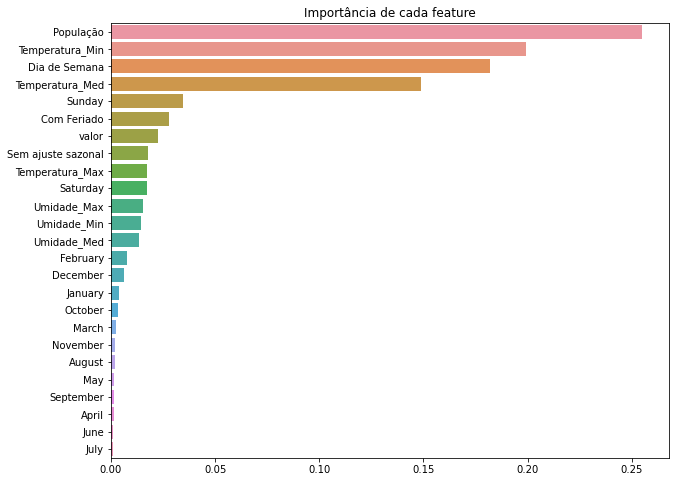

In [16]:
plt.figure(figsize=(10,8 ));
importances = pd.Series(data=RF_regressor.feature_importances_, index=['valor', 'Sem ajuste sazonal',
       'População', 'Com Feriado', 'Sunday', 'Saturday',
       'Dia de Semana','Temperatura_Max',
       'Umidade_Max', 'Temperatura_Min', 'Umidade_Min', 'Temperatura_Med',
       'Umidade_Med', 'April', 'August', 'December', 'February',
       'January', 'July', 'June', 'March', 'May', 'November', 'October',
       'September' ]).sort_values(ascending=False)
sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada feature')

**Com dados normalizados**

In [17]:
RF_regressor = RandomForestRegressor(n_estimators=200, oob_score=True)
RF_regressor.fit(X_train_std, y_train_std)

RandomForestRegressor(n_estimators=200, oob_score=True)

In [18]:
y_pred = RF_regressor.predict(X_val_std)
y_pred[:10]

array([[4451.3       , 2513.48      , 3614.06385417],
       [4198.375     , 2224.325     , 3328.98895847],
       [4632.43      , 2631.6       , 3811.49552714],
       [4721.98      , 2972.7       , 3904.40298643],
       [4671.135     , 3138.285     , 3798.76887153],
       [4587.07      , 2510.585     , 3731.18816362],
       [3465.305     , 1962.02      , 2475.47444936],
       [4001.79      , 2252.98      , 3263.46338225],
       [4034.375     , 2337.705     , 3028.2324375 ],
       [4974.73      , 2785.825     , 3995.07311111]])

In [19]:
y_val_std[:10]

,Demanda_Max,Demanda_Min,Demanda_Med
4678,4571.0,2787.0,3782.426389
892,4343.0,2330.0,3401.870833
3215,4523.0,2621.0,3748.583333
1796,4984.0,3048.0,4106.559722
5159,4901.0,3148.0,4048.491667
3189,4614.0,2598.0,3825.556944
91,3470.0,1872.0,2413.688889
1384,3967.0,2276.0,3245.770833
1637,4262.0,2342.0,3064.450000
5020,4836.0,2508.0,3852.847917


**Avaliação do modelo**

In [20]:
print('MAE:',mean_absolute_error(y_val_std, y_pred))
MSE = mean_squared_error(y_val_std, y_pred)
print('RMSE:',np.sqrt(MSE))
R2 = r2_score(y_val_std, y_pred)
print('R2 Score:', R2)
n= len(X_train_std)
p = len(X_train_std.columns)
print('Adj R2 Score', 1-(1-R2)*(n-1)/(n-p-1))

MAE: 136.1502910288094
RMSE: 192.8008706205032
R2 Score: 0.8686292546577956
Adj R2 Score 0.8675282594739019


Percebemos que não tem muita diferença entre os dados normalizados ou não.

Verificando os melhores parâmetros, com o RandomizedSearchCV

In [21]:
from sklearn.model_selection import RandomizedSearchCV
import pprint

In [22]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 500, num = 50)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 20)]
max_depth.append(None)
min_samples_split = [2, 4, 8, 1]
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 15, 20, 25, 31, 36, 41, 46, 52, 57, 62, 67, 73, 78, 83, 88, 94, 99, 104, 110, None], 'min_samples_split': [2, 4, 8, 1], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [23]:
rf = RandomForestRegressor()

In [24]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [25]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   34.9s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.1min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 15, 20, 25, 31, 36,
                                                      41, 46, 52, 57, 62, 67,
                                                      73, 78, 83, 88, 94, 99,
                                                      104, 110, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 8, 1],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100, 110,
                                                         120, 130, 140, 150,
                                                         160, 170, 1

In [26]:
rf_random.best_params_

{'n_estimators': 500,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 67,
 'bootstrap': False}

Testando essa configuração:

In [27]:
RF_regressor = RandomForestRegressor(n_estimators=106, min_samples_split=5, min_samples_leaf=1,max_features='sqrt',
                                     max_depth=100, bootstrap=False)
RF_regressor.fit(X_train_std, y_train_std)

RandomForestRegressor(bootstrap=False, max_depth=100, max_features='sqrt',
                      min_samples_split=5, n_estimators=106)

In [28]:
y_pred = RF_regressor.predict(X_val_std)
y_pred[:10]

array([[4461.35691824, 2535.12657233, 3638.97697141],
       [4213.89308176, 2229.93238994, 3330.35450241],
       [4580.58962264, 2611.29481132, 3771.07916815],
       [4760.88836478, 2980.93710692, 3923.77604802],
       [4583.89465409, 3055.65880503, 3715.38858738],
       [4559.18238994, 2514.70833333, 3708.33002443],
       [3531.00628931, 2017.76572327, 2539.59153319],
       [3989.70754717, 2276.46305031, 3277.3751485 ],
       [4054.03459119, 2345.59198113, 3042.04194019],
       [4892.61713836, 2772.54716981, 3925.32688734]])

In [29]:
y_val_std[:10]

,Demanda_Max,Demanda_Min,Demanda_Med
4678,4571.0,2787.0,3782.426389
892,4343.0,2330.0,3401.870833
3215,4523.0,2621.0,3748.583333
1796,4984.0,3048.0,4106.559722
5159,4901.0,3148.0,4048.491667
3189,4614.0,2598.0,3825.556944
91,3470.0,1872.0,2413.688889
1384,3967.0,2276.0,3245.770833
1637,4262.0,2342.0,3064.450000
5020,4836.0,2508.0,3852.847917


In [30]:
print('MAE:',mean_absolute_error(y_val_std, y_pred))
MSE = mean_squared_error(y_val_std, y_pred)
print('RMSE:',np.sqrt(MSE))
R2 = r2_score(y_val_std, y_pred)
print('R2 Score:', R2)
n= len(X_train_std)
p = len(X_train_std.columns)
print('Adj R2 Score', 1-(1-R2)*(n-1)/(n-p-1))

MAE: 134.23040176698677
RMSE: 187.30364193141654
R2 Score: 0.8764691643992822
Adj R2 Score 0.8754338741243852


In [31]:
RF_regressor = RandomForestRegressor(n_estimators=500, min_samples_split=4, min_samples_leaf=1,max_features='sqrt',
                                     max_depth=67, bootstrap=False)
RF_regressor.fit(X_train_std, y_train_std)

RandomForestRegressor(bootstrap=False, max_depth=67, max_features='sqrt',
                      min_samples_split=4, n_estimators=500)

In [32]:
y_pred = RF_regressor.predict(X_val_std)
y_pred[:10]

array([[4436.64533333, 2525.49566667, 3617.77319139],
       [4224.24466667, 2229.32333333, 3338.26706246],
       [4595.81133333, 2627.088     , 3783.69391707],
       [4732.91966667, 2990.02966667, 3912.65952817],
       [4640.59866667, 3090.09033333, 3758.16434641],
       [4576.612     , 2530.68966667, 3722.48464382],
       [3539.07533333, 2020.155     , 2544.18742125],
       [3994.00766667, 2285.236     , 3280.12933389],
       [4065.992     , 2353.28133333, 3053.40469352],
       [4838.89433333, 2731.33266667, 3862.14347685]])

In [33]:
y_val_std[:10]

,Demanda_Max,Demanda_Min,Demanda_Med
4678,4571.0,2787.0,3782.426389
892,4343.0,2330.0,3401.870833
3215,4523.0,2621.0,3748.583333
1796,4984.0,3048.0,4106.559722
5159,4901.0,3148.0,4048.491667
3189,4614.0,2598.0,3825.556944
91,3470.0,1872.0,2413.688889
1384,3967.0,2276.0,3245.770833
1637,4262.0,2342.0,3064.450000
5020,4836.0,2508.0,3852.847917


In [34]:
print('MAE:',mean_absolute_error(y_val_std, y_pred))
MSE = mean_squared_error(y_val_std, y_pred)
print('RMSE:',np.sqrt(MSE))
R2 = r2_score(y_val_std, y_pred)
print('R2 Score:', R2)
n= len(X_train_std)
p = len(X_train_std.columns)
print('Adj R2 Score', 1-(1-R2)*(n-1)/(n-p-1))

MAE: 133.83491941876386
RMSE: 187.4870361632381
R2 Score: 0.8760854148147431
Adj R2 Score 0.8750469084018596


Houve uma melhora relativamente pequena. Vamos avaliar separadamente por demanda.

**Avaliação para demanda máxima**

In [35]:
#Demanda Máxima
print('MAE:',mean_absolute_error(y_val_std['Demanda_Max'], y_pred[:,0]))
MSE = mean_squared_error(y_val_std['Demanda_Max'], y_pred[:,0])
print('RMSE:',np.sqrt(MSE))
R2 = r2_score(y_val_std['Demanda_Max'], y_pred[:,0])
print('R2 Score:', R2)
n= len(X_train)
p = len(X_train.columns)
print('Adj R2 Score', 1-(1-R2)*(n-1)/(n-p-1))
print('Variance Score:', explained_variance_score(y_val_std['Demanda_Max'], y_pred[:,0]))

MAE: 133.11658264168526
RMSE: 192.53548899022314
R2 Score: 0.8889822200345849
Adj R2 Score 0.8880517994850927
Variance Score: 0.8889904743026837


**Avaliação para demanda média**

In [36]:
#Demanda Média
print('MAE:',mean_absolute_error(y_val_std['Demanda_Med'], y_pred[:,2]))
MSE = mean_squared_error(y_val_std['Demanda_Med'], y_pred[:,2])
print('RMSE:',np.sqrt(MSE))
R2 = r2_score(y_val_std['Demanda_Med'], y_pred[:,2])
print('R2 Score:', R2)
n= len(X_train)
p = len(X_train.columns)
print('Adj R2 Score', 1-(1-R2)*(n-1)/(n-p-1))
print('Variance Score:', explained_variance_score(y_val_std['Demanda_Med'], y_pred[:,2]))

MAE: 120.62891614884765
RMSE: 172.08592178264644
R2 Score: 0.9124231080526741
Adj R2 Score 0.9116891414758443
Variance Score: 0.9124368039006121


**Avaliação para demanda mínima**

In [37]:
#Demanda Mínima
print('MAE:',mean_absolute_error(y_val_std['Demanda_Min'], y_pred[:,1]))
MSE = mean_squared_error(y_val_std['Demanda_Min'], y_pred[:,1])
print('RMSE:',np.sqrt(MSE))
R2 = r2_score(y_val_std['Demanda_Min'], y_pred[:,1])
print('R2 Score:', R2)
n= len(X_train)
p = len(X_train.columns)
print('Adj R2 Score', 1-(1-R2)*(n-1)/(n-p-1))
print('Variance Score:', explained_variance_score(y_val_std['Demanda_Min'], y_pred[:,1]))

MAE: 147.75925946575862
RMSE: 196.90273535768512
R2 Score: 0.8268509163569705
Adj R2 Score 0.8253997842446421
Variance Score: 0.8268672004820623


In [38]:
importances = pd.Series(data=RF_regressor.feature_importances_, index=['IAEBR', 'Desempenho Industrial',
       'População', 'Com Feriado', 'Domingo', 'Sábado',
       'Dia de Semana','Temperatura_Max',
       'Umidade_Max', 'Temperatura_Min', 'Umidade_Min', 'Temperatura_Med',
       'Umidade_Med', 'Abril', 'Agosto', 'Dezembro', 'Fevereiro',
       'January', 'July', 'June', 'March', 'May', 'November', 'October',
       'September' ]).sort_values(ascending=False)

In [39]:
importances[:10]

População                0.171199
Temperatura_Min          0.142057
Temperatura_Med          0.130080
Dia de Semana            0.122381
IAEBR                    0.092347
Domingo                  0.083301
Temperatura_Max          0.061868
Desempenho Industrial    0.037897
Sábado                   0.023333
Com Feriado              0.022249
dtype: float64

<AxesSubplot:>

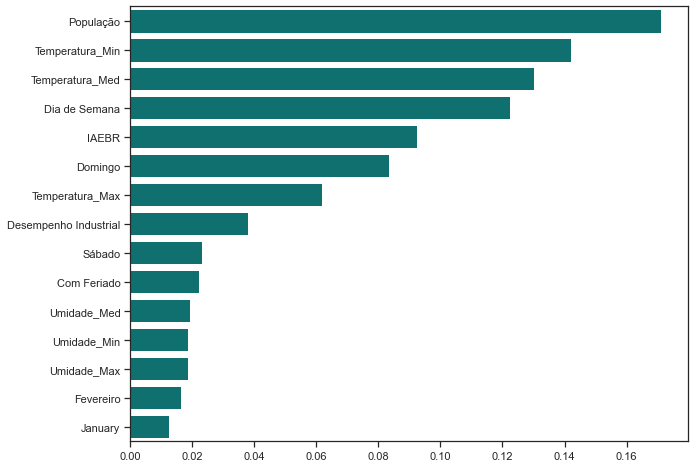

In [40]:
sns.set(style="ticks", color_codes=True)
plt.figure(figsize=(10,8 ));
sns.barplot(x=importances[:15], y=importances.index[:15], orient='h', color='teal')

### Treinar o modelo com os dados de validação + treino

In [41]:
#Dividir entre dataset de treino e teste dados normalizados
X_train_std,X_test_std,y_train_std,y_test_std = train_test_split(X_std,Y,test_size=0.25,random_state=0)

In [42]:
RF_regressor = RandomForestRegressor(n_estimators=500, min_samples_split=4, min_samples_leaf=1,max_features='sqrt',
                                     max_depth=67, bootstrap=False)
RF_regressor.fit(X_train_std, y_train_std)
y_pred = RF_regressor.predict(X_test_std)

**Avaliação para Demanda Máxima**

In [43]:
#Demanda Máxima
print('MAE:',mean_absolute_error(y_test_std['Demanda_Max'], y_pred[:,0]))
MSE = mean_squared_error(y_test_std['Demanda_Max'], y_pred[:,0])
print('RMSE:',np.sqrt(MSE))
R2 = r2_score(y_test_std['Demanda_Max'], y_pred[:,0])
print('R2 Score:', R2)
n= len(X_train)
p = len(X_train.columns)
print('Adj R2 Score', 1-(1-R2)*(n-1)/(n-p-1))

MAE: 136.14515547126396
RMSE: 201.01889536790472
R2 Score: 0.8879054089489318
Adj R2 Score 0.8869659638345245


**Avaliação para Demanda Média**

In [44]:
#Demanda Média
print('MAE:',mean_absolute_error(y_test_std['Demanda_Med'], y_pred[:,2]))
MSE = mean_squared_error(y_test_std['Demanda_Med'], y_pred[:,2])
print('RMSE:',np.sqrt(MSE))
R2 = r2_score(y_test_std['Demanda_Med'], y_pred[:,2])
print('R2 Score:', R2)
n= len(X_train)
p = len(X_train.columns)
print('Adj R2 Score', 1-(1-R2)*(n-1)/(n-p-1))

MAE: 123.14237647335217
RMSE: 182.41560461688
R2 Score: 0.9085476786989254
Adj R2 Score 0.9077812328281487


**Avaliação para Demanda Mínima**

In [45]:
#Demanda Mínima
print('MAE:',mean_absolute_error(y_test_std['Demanda_Min'], y_pred[:,1]))
MSE = mean_squared_error(y_test_std['Demanda_Min'], y_pred[:,1])
print('RMSE:',np.sqrt(MSE))
R2 = r2_score(y_test_std['Demanda_Min'], y_pred[:,1])
print('R2 Score:', R2)
n= len(X_train)
p = len(X_train.columns)
print('Adj R2 Score', 1-(1-R2)*(n-1)/(n-p-1))

MAE: 148.23161431324945
RMSE: 205.01882426082614
R2 Score: 0.8279316968784806
Adj R2 Score 0.826489622598213


### SVR

Com o SVR não é possível prever as 3 demandas de apenas uma vez. Para esse algoritmo será utilizado apenas os dados normalizados, pela maneira como ele funciona.

In [46]:
from sklearn.svm import SVR

In [47]:
#Dividir entre dataset de treino e teste dados normalizados
X_train_std,X_test_std,y_train_std,y_test_std = train_test_split(X_std,Y,test_size=0.25,random_state=0)

#Dividir entre dataset de treino e validação
X_train_std,X_val_std,y_train_std,y_val_std = train_test_split(X_train_std,y_train_std,test_size=0.25,random_state=0)

**Previsão da demanda máxima**

In [48]:
svr_max = SVR(kernel='poly', C=190, gamma='auto', degree=3, epsilon=.5,
               coef0=1)
svr_max.fit(X_train_std,y_train_std['Demanda_Max'])
y_pred_max = svr_max.predict(X_val_std)

**Avaliação do modelo**

In [49]:
print('Predição Demanda Máxima')
print('MAE:',mean_absolute_error(y_val['Demanda_Max'], y_pred_max))
MSE = mean_squared_error(y_val['Demanda_Max'], y_pred_max)
print('RMSE:',np.sqrt(MSE))
R2 = r2_score(y_val['Demanda_Max'], y_pred_max)
print('R2 Score:', R2)
n= len(X_train)
p = len(X_train.columns)
print('Adj R2 Score', 1-(1-R2)*(n-1)/(n-p-1))

Predição Demanda Máxima
MAE: 129.7216006461115
RMSE: 192.55918964853836
R2 Score: 0.888954886305821
Adj R2 Score 0.8880242366771403


**Previsão da demanda média**

In [50]:
svr_med= SVR(kernel='poly', C=140, gamma='auto', degree=3, epsilon=.1,
               coef0=1)
svr_med.fit(X_train_std,y_train_std['Demanda_Med'])
y_pred_med = svr_med.predict(X_val_std)

**Avaliação do modelo**

In [51]:
print('Predição Demanda Média')
print('MAE:',mean_absolute_error(y_val['Demanda_Med'], y_pred_med))
MSE = mean_squared_error(y_val['Demanda_Med'], y_pred_med)
print('RMSE:',np.sqrt(MSE))
R2 = r2_score(y_val['Demanda_Med'], y_pred_med)
print('R2 Score:', R2)
n= len(X_train)
p = len(X_train.columns)
print('Adj R2 Score', 1-(1-R2)*(n-1)/(n-p-1))

Predição Demanda Média
MAE: 106.79272547630904
RMSE: 159.50323268170987
R2 Score: 0.9247618995808036
Adj R2 Score 0.9241313422524495


**Previsão da demanda mínima**

In [52]:
svr_min = SVR(kernel='poly', C=190, gamma='auto', degree=3, epsilon=.1,
               coef0=1)
svr_min.fit(X_train_std,y_train_std['Demanda_Min'])
y_pred_min = svr_min.predict(X_val_std)

**Avaliação do modelo**

In [53]:
print('Predição Demanda Mínima')
print('MAE:',mean_absolute_error(y_val['Demanda_Min'], y_pred_min))
MSE = mean_squared_error(y_val['Demanda_Min'], y_pred_min)
print('RMSE:',np.sqrt(MSE))
R2 = r2_score(y_val['Demanda_Min'], y_pred_min)
print('R2 Score:', R2)
n= len(X_train)
p = len(X_train.columns)
print('Adj R2 Score', 1-(1-R2)*(n-1)/(n-p-1))

Predição Demanda Mínima
MAE: 130.32110526169168
RMSE: 179.33207137382763
R2 Score: 0.8563741445520938
Adj R2 Score 0.8551704414390541


### Treinamento do modelo com dados de treino + validação

In [54]:
#Dividir entre dataset de treino e teste dados normalizados
X_train,X_test, y_train, y_test = train_test_split(X_std,Y,test_size=0.25,random_state=0)

In [55]:
svr_max = SVR(kernel='poly', C=190, gamma='auto', degree=3, epsilon=.5,
               coef0=1)
svr_max.fit(X_train,y_train['Demanda_Max'])
y_pred_max = svr_max.predict(X_test)

In [56]:
svr_med= SVR(kernel='poly', C=140, gamma='auto', degree=3, epsilon=.1,
               coef0=1)
svr_med.fit(X_train,y_train['Demanda_Med'])
y_pred_med = svr_med.predict(X_test)

In [57]:
svr_min = SVR(kernel='poly', C=190, gamma='auto', degree=3, epsilon=.1,
               coef0=1)
svr_min.fit(X_train,y_train['Demanda_Min'])
y_pred_min = svr_min.predict(X_test)

**Avaliação com o dataset de teste**

In [58]:
print('Predição Demanda Máxima')
print('MAE:',mean_absolute_error(y_test['Demanda_Max'], y_pred_max))
MSE = mean_squared_error(y_test['Demanda_Max'], y_pred_max)
print('RMSE:',np.sqrt(MSE))
R2 = r2_score(y_test['Demanda_Max'], y_pred_max)
print('R2 Score:', R2)
n= len(X_train)
p = len(X_train.columns)
print('Adj R2 Score', 1-(1-R2)*(n-1)/(n-p-1))

Predição Demanda Máxima
MAE: 129.75724629788772
RMSE: 184.52633953514535
R2 Score: 0.9055444185043627
Adj R2 Score 0.9049519976470143


In [59]:
print('Predição Demanda Média')
print('MAE:',mean_absolute_error(y_test['Demanda_Med'], y_pred_med))
MSE = mean_squared_error(y_test['Demanda_Med'], y_pred_med)
print('RMSE:',np.sqrt(MSE))
R2 = r2_score(y_test['Demanda_Med'], y_pred_med)
print('R2 Score:', R2)
n= len(X_train)
p = len(X_train.columns)
print('Adj R2 Score', 1-(1-R2)*(n-1)/(n-p-1))

Predição Demanda Média
MAE: 113.08148081770504
RMSE: 163.7525709923894
R2 Score: 0.9263034743128643
Adj R2 Score 0.9258412532536123


In [60]:
print('Predição Demanda Máxima')
print('MAE:',mean_absolute_error(y_test['Demanda_Min'], y_pred_min))
MSE = mean_squared_error(y_test['Demanda_Min'], y_pred_min)
print('RMSE:',np.sqrt(MSE))
R2 = r2_score(y_test['Demanda_Min'], y_pred_min)
print('R2 Score:', R2)
n= len(X_train)
p = len(X_train.columns)
print('Adj R2 Score', 1-(1-R2)*(n-1)/(n-p-1))

Predição Demanda Máxima
MAE: 136.05926945081785
RMSE: 190.15764421820884
R2 Score: 0.8519729870415589
Adj R2 Score 0.851044568746536


### Rede Neural

In [73]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dense

In [75]:
from keras.regularizers import l1
from keras.regularizers import l2
from keras.regularizers import l1_l2

Using TensorFlow backend.


**Divisão dos dados**

In [76]:
X_train,X_test,y_train,y_test = train_test_split(X_std,Y,test_size=0.25,random_state=0)

**Previsão de todas as demandas juntas**

In [89]:
model = Sequential()
model.add(Dense(128, input_dim=25, kernel_initializer='normal', activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu')) ##Estava 32 e troquei para 16
model.add(Dense(16, activation='linear'))
model.add(Dense(3, activation='linear'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 128)               3328      
_________________________________________________________________
dense_15 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_16 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_17 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_18 (Dense)             (None, 3)                 51        
Total params: 9,091
Trainable params: 9,091
Non-trainable params: 0
_________________________________________________________________


In [100]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
history = model.fit(X_train, y_train, epochs=100, batch_size=16,  verbose=1, validation_split=0.2)

Train on 3209 samples, validate on 803 samples
Epoch 1/100
3209/3209 [==============================] - 0s 125us/sample - loss: 32038.6683 - mean_squared_error: 32038.6719 - mean_absolute_error: 123.3731 - val_loss: 34143.6626 - val_mean_squared_error: 34143.6641 - val_mean_absolute_error: 133.5995
Epoch 2/100
3209/3209 [==============================] - 0s 67us/sample - loss: 31397.9884 - mean_squared_error: 31397.9883 - mean_absolute_error: 123.0751 - val_loss: 34767.6810 - val_mean_squared_error: 34767.6797 - val_mean_absolute_error: 133.4278
Epoch 3/100
3209/3209 [==============================] - 0s 68us/sample - loss: 31824.3759 - mean_squared_error: 31824.3848 - mean_absolute_error: 123.7991 - val_loss: 34154.2491 - val_mean_squared_error: 34154.2500 - val_mean_absolute_error: 133.4033
Epoch 4/100
3209/3209 [==============================] - 0s 70us/sample - loss: 31492.8707 - mean_squared_error: 31492.8672 - mean_absolute_error: 124.0656 - val_loss: 32976.0287 - val_mean_square

3209/3209 [==============================] - 0s 69us/sample - loss: 30182.7615 - mean_squared_error: 30182.7480 - mean_absolute_error: 121.9741 - val_loss: 34670.6056 - val_mean_squared_error: 34670.6094 - val_mean_absolute_error: 138.1284
Epoch 34/100
3209/3209 [==============================] - 0s 70us/sample - loss: 30740.1704 - mean_squared_error: 30740.1523 - mean_absolute_error: 123.6092 - val_loss: 32272.8829 - val_mean_squared_error: 32272.8809 - val_mean_absolute_error: 131.0982
Epoch 35/100
3209/3209 [==============================] - 0s 70us/sample - loss: 29873.3876 - mean_squared_error: 29873.3828 - mean_absolute_error: 121.2054 - val_loss: 32554.3572 - val_mean_squared_error: 32554.3555 - val_mean_absolute_error: 131.5809
Epoch 36/100
3209/3209 [==============================] - 0s 69us/sample - loss: 30054.9604 - mean_squared_error: 30054.9551 - mean_absolute_error: 121.7252 - val_loss: 32581.9688 - val_mean_squared_error: 32581.9668 - val_mean_absolute_error: 131.1785
E

3209/3209 [==============================] - 0s 69us/sample - loss: 29313.8559 - mean_squared_error: 29313.8574 - mean_absolute_error: 119.9277 - val_loss: 31786.3244 - val_mean_squared_error: 31786.3242 - val_mean_absolute_error: 130.5848
Epoch 66/100
3209/3209 [==============================] - 0s 70us/sample - loss: 29268.5911 - mean_squared_error: 29268.5918 - mean_absolute_error: 119.2537 - val_loss: 32255.8112 - val_mean_squared_error: 32255.8164 - val_mean_absolute_error: 131.2021
Epoch 67/100
3209/3209 [==============================] - 0s 67us/sample - loss: 29035.3467 - mean_squared_error: 29035.3496 - mean_absolute_error: 119.7906 - val_loss: 33739.1622 - val_mean_squared_error: 33739.1641 - val_mean_absolute_error: 136.4911
Epoch 68/100
3209/3209 [==============================] - 0s 69us/sample - loss: 29623.1592 - mean_squared_error: 29623.1504 - mean_absolute_error: 120.6570 - val_loss: 32789.9317 - val_mean_squared_error: 32789.9297 - val_mean_absolute_error: 132.2551
E

3209/3209 [==============================] - 0s 71us/sample - loss: 28540.4840 - mean_squared_error: 28540.4922 - mean_absolute_error: 118.4418 - val_loss: 33450.8302 - val_mean_squared_error: 33450.8281 - val_mean_absolute_error: 132.1454
Epoch 98/100
3209/3209 [==============================] - 0s 71us/sample - loss: 28821.6511 - mean_squared_error: 28821.6465 - mean_absolute_error: 118.9862 - val_loss: 32318.7758 - val_mean_squared_error: 32318.7754 - val_mean_absolute_error: 131.1757
Epoch 99/100
3209/3209 [==============================] - 0s 71us/sample - loss: 28772.0295 - mean_squared_error: 28772.0195 - mean_absolute_error: 118.7812 - val_loss: 32531.7476 - val_mean_squared_error: 32531.7441 - val_mean_absolute_error: 132.9739
Epoch 100/100
3209/3209 [==============================] - 0s 70us/sample - loss: 28732.3000 - mean_squared_error: 28732.2930 - mean_absolute_error: 119.0430 - val_loss: 32248.4355 - val_mean_squared_error: 32248.4336 - val_mean_absolute_error: 132.2652


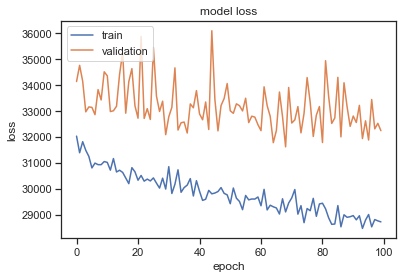

In [101]:
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.ylim((15000,50000))
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

***Diminuindo uma camada:***

In [95]:
model_2 = Sequential()
model_2.add(Dense(128, input_dim=25, kernel_initializer='normal', activation='relu'))
model_2.add(Dense(32, activation='relu'))
model_2.add(Dense(16, activation='linear'))
model_2.add(Dense(3, activation='linear'))
model_2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 128)               3328      
_________________________________________________________________
dense_24 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_25 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_26 (Dense)             (None, 3)                 51        
Total params: 8,035
Trainable params: 8,035
Non-trainable params: 0
_________________________________________________________________


In [102]:
model_2.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
history = model_2.fit(X_train, y_train, epochs=100, batch_size=16,  verbose=1, validation_split=0.2)

Train on 3209 samples, validate on 803 samples
Epoch 1/100
3209/3209 [==============================] - 0s 132us/sample - loss: 10332566.4590 - mean_squared_error: 10332566.0000 - mean_absolute_error: 3021.7776 - val_loss: 1878742.3160 - val_mean_squared_error: 1878742.2500 - val_mean_absolute_error: 1161.1763
Epoch 2/100
3209/3209 [==============================] - 0s 74us/sample - loss: 773051.8146 - mean_squared_error: 773052.0000 - mean_absolute_error: 683.4797 - val_loss: 383597.4838 - val_mean_squared_error: 383597.4375 - val_mean_absolute_error: 475.7797
Epoch 3/100
3209/3209 [==============================] - 0s 71us/sample - loss: 222838.5018 - mean_squared_error: 222838.4219 - mean_absolute_error: 354.7885 - val_loss: 151561.7565 - val_mean_squared_error: 151561.7656 - val_mean_absolute_error: 298.6706
Epoch 4/100
3209/3209 [==============================] - 0s 73us/sample - loss: 113761.7730 - mean_squared_error: 113761.8047 - mean_absolute_error: 256.9746 - val_loss: 102788

3209/3209 [==============================] - 0s 69us/sample - loss: 35829.5009 - mean_squared_error: 35829.5000 - mean_absolute_error: 137.2398 - val_loss: 39956.6867 - val_mean_squared_error: 39956.6797 - val_mean_absolute_error: 148.7640
Epoch 34/100
3209/3209 [==============================] - 0s 69us/sample - loss: 35089.2289 - mean_squared_error: 35089.2422 - mean_absolute_error: 135.8516 - val_loss: 37006.3239 - val_mean_squared_error: 37006.3203 - val_mean_absolute_error: 140.8383
Epoch 35/100
3209/3209 [==============================] - 0s 70us/sample - loss: 34744.9964 - mean_squared_error: 34744.9922 - mean_absolute_error: 134.1160 - val_loss: 36381.3974 - val_mean_squared_error: 36381.3984 - val_mean_absolute_error: 140.7320
Epoch 36/100
3209/3209 [==============================] - 0s 68us/sample - loss: 34873.9493 - mean_squared_error: 34873.9453 - mean_absolute_error: 134.2700 - val_loss: 36312.7398 - val_mean_squared_error: 36312.7461 - val_mean_absolute_error: 141.4012
E

3209/3209 [==============================] - 0s 71us/sample - loss: 31291.5932 - mean_squared_error: 31291.5898 - mean_absolute_error: 126.3370 - val_loss: 37184.5932 - val_mean_squared_error: 37184.5938 - val_mean_absolute_error: 141.7044
Epoch 66/100
3209/3209 [==============================] - 0s 70us/sample - loss: 31895.7977 - mean_squared_error: 31895.7910 - mean_absolute_error: 127.6636 - val_loss: 35113.4180 - val_mean_squared_error: 35113.4141 - val_mean_absolute_error: 139.3268
Epoch 67/100
3209/3209 [==============================] - 0s 70us/sample - loss: 31876.8128 - mean_squared_error: 31876.8164 - mean_absolute_error: 127.7517 - val_loss: 38237.7266 - val_mean_squared_error: 38237.7266 - val_mean_absolute_error: 147.7858
Epoch 68/100
3209/3209 [==============================] - 0s 69us/sample - loss: 31157.6183 - mean_squared_error: 31157.6211 - mean_absolute_error: 126.7010 - val_loss: 33644.0733 - val_mean_squared_error: 33644.0703 - val_mean_absolute_error: 134.0380
E

3209/3209 [==============================] - 0s 69us/sample - loss: 30715.9999 - mean_squared_error: 30715.9922 - mean_absolute_error: 125.0700 - val_loss: 32869.6171 - val_mean_squared_error: 32869.6172 - val_mean_absolute_error: 134.6537
Epoch 98/100
3209/3209 [==============================] - 0s 69us/sample - loss: 29843.8136 - mean_squared_error: 29843.7988 - mean_absolute_error: 122.5055 - val_loss: 32740.1449 - val_mean_squared_error: 32740.1465 - val_mean_absolute_error: 133.7398
Epoch 99/100
3209/3209 [==============================] - 0s 68us/sample - loss: 30022.6634 - mean_squared_error: 30022.6543 - mean_absolute_error: 122.9868 - val_loss: 32288.6204 - val_mean_squared_error: 32288.6211 - val_mean_absolute_error: 132.8210
Epoch 100/100
3209/3209 [==============================] - 0s 70us/sample - loss: 29959.5586 - mean_squared_error: 29959.5605 - mean_absolute_error: 122.5920 - val_loss: 32786.9061 - val_mean_squared_error: 32786.9023 - val_mean_absolute_error: 131.4628


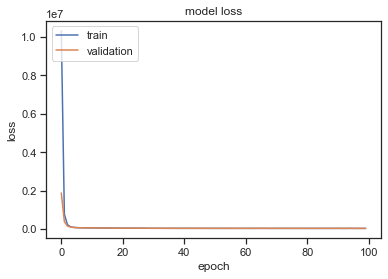

In [103]:
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.ylim((15000,50000))
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [106]:
model_3 = Sequential()
model_3.add(Dense(128, input_dim=25, kernel_initializer='orthogonal', activation='relu'))
model_3.add(Dense(32, activation='relu')) ##Melhorou um pouco com a regularização
model_3.add(Dense(3, activation='linear'))
model_3.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 128)               3328      
_________________________________________________________________
dense_31 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_32 (Dense)             (None, 3)                 99        
Total params: 7,555
Trainable params: 7,555
Non-trainable params: 0
_________________________________________________________________


In [107]:
model_3.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
history = model_3.fit(X_train, y_train, epochs=200, batch_size=16,  verbose=1, validation_split=0.2)

Train on 3209 samples, validate on 803 samples
Epoch 1/200
3209/3209 [==============================] - 0s 136us/sample - loss: 12884790.3873 - mean_squared_error: 12884791.0000 - mean_absolute_error: 3469.5005 - val_loss: 11611474.6339 - val_mean_squared_error: 11611474.0000 - val_mean_absolute_error: 3283.9155
Epoch 2/200
3209/3209 [==============================] - 0s 73us/sample - loss: 7367950.8665 - mean_squared_error: 7367953.0000 - mean_absolute_error: 2514.8813 - val_loss: 3066904.0153 - val_mean_squared_error: 3066903.5000 - val_mean_absolute_error: 1525.9011
Epoch 3/200
3209/3209 [==============================] - 0s 68us/sample - loss: 1602566.6568 - mean_squared_error: 1602567.0000 - mean_absolute_error: 1037.0522 - val_loss: 962533.0623 - val_mean_squared_error: 962533.0000 - val_mean_absolute_error: 799.1185
Epoch 4/200
3209/3209 [==============================] - 0s 67us/sample - loss: 683990.2124 - mean_squared_error: 683990.1875 - mean_absolute_error: 657.0599 - val_l

3209/3209 [==============================] - 0s 69us/sample - loss: 38872.0960 - mean_squared_error: 38872.0938 - mean_absolute_error: 144.1881 - val_loss: 40870.5176 - val_mean_squared_error: 40870.5195 - val_mean_absolute_error: 151.6771
Epoch 34/200
3209/3209 [==============================] - 0s 68us/sample - loss: 38668.6565 - mean_squared_error: 38668.6602 - mean_absolute_error: 143.4795 - val_loss: 40035.5486 - val_mean_squared_error: 40035.5469 - val_mean_absolute_error: 149.7103
Epoch 35/200
3209/3209 [==============================] - 0s 68us/sample - loss: 38374.2389 - mean_squared_error: 38374.2461 - mean_absolute_error: 142.4187 - val_loss: 39467.1094 - val_mean_squared_error: 39467.1094 - val_mean_absolute_error: 148.0442
Epoch 36/200
3209/3209 [==============================] - 0s 68us/sample - loss: 37830.7098 - mean_squared_error: 37830.7070 - mean_absolute_error: 141.2707 - val_loss: 39206.4538 - val_mean_squared_error: 39206.4453 - val_mean_absolute_error: 147.4582
E

3209/3209 [==============================] - 0s 68us/sample - loss: 33497.5496 - mean_squared_error: 33497.5508 - mean_absolute_error: 130.7465 - val_loss: 34627.0752 - val_mean_squared_error: 34627.0742 - val_mean_absolute_error: 135.6005
Epoch 66/200
3209/3209 [==============================] - 0s 68us/sample - loss: 33258.6241 - mean_squared_error: 33258.6250 - mean_absolute_error: 129.9302 - val_loss: 35389.8426 - val_mean_squared_error: 35389.8398 - val_mean_absolute_error: 138.4314
Epoch 67/200
3209/3209 [==============================] - 0s 67us/sample - loss: 33125.0806 - mean_squared_error: 33125.0742 - mean_absolute_error: 130.0513 - val_loss: 35545.5898 - val_mean_squared_error: 35545.5898 - val_mean_absolute_error: 137.3615
Epoch 68/200
3209/3209 [==============================] - 0s 68us/sample - loss: 33191.1754 - mean_squared_error: 33191.1680 - mean_absolute_error: 130.0708 - val_loss: 34601.9431 - val_mean_squared_error: 34601.9414 - val_mean_absolute_error: 135.6787
E

3209/3209 [==============================] - 0s 69us/sample - loss: 31622.5068 - mean_squared_error: 31622.5020 - mean_absolute_error: 126.3717 - val_loss: 34165.0418 - val_mean_squared_error: 34165.0391 - val_mean_absolute_error: 135.2398
Epoch 98/200
3209/3209 [==============================] - 0s 69us/sample - loss: 31511.7434 - mean_squared_error: 31511.7383 - mean_absolute_error: 126.2034 - val_loss: 33631.9436 - val_mean_squared_error: 33631.9375 - val_mean_absolute_error: 134.9380
Epoch 99/200
3209/3209 [==============================] - 0s 67us/sample - loss: 31698.6823 - mean_squared_error: 31698.6875 - mean_absolute_error: 126.6806 - val_loss: 33338.5247 - val_mean_squared_error: 33338.5273 - val_mean_absolute_error: 132.8286
Epoch 100/200
3209/3209 [==============================] - 0s 67us/sample - loss: 31304.9256 - mean_squared_error: 31304.9277 - mean_absolute_error: 125.6028 - val_loss: 33883.4469 - val_mean_squared_error: 33883.4453 - val_mean_absolute_error: 134.8380


3209/3209 [==============================] - 0s 67us/sample - loss: 30636.4991 - mean_squared_error: 30636.4980 - mean_absolute_error: 124.2152 - val_loss: 33014.6684 - val_mean_squared_error: 33014.6719 - val_mean_absolute_error: 132.3696
Epoch 130/200
3209/3209 [==============================] - 0s 68us/sample - loss: 30241.3753 - mean_squared_error: 30241.3906 - mean_absolute_error: 123.5135 - val_loss: 33879.8306 - val_mean_squared_error: 33879.8320 - val_mean_absolute_error: 135.1958
Epoch 131/200
3209/3209 [==============================] - 0s 69us/sample - loss: 30426.2835 - mean_squared_error: 30426.2910 - mean_absolute_error: 124.1749 - val_loss: 33232.4685 - val_mean_squared_error: 33232.4727 - val_mean_absolute_error: 134.3123
Epoch 132/200
3209/3209 [==============================] - 0s 68us/sample - loss: 30261.4524 - mean_squared_error: 30261.4492 - mean_absolute_error: 123.2992 - val_loss: 32880.1284 - val_mean_squared_error: 32880.1289 - val_mean_absolute_error: 132.909

3209/3209 [==============================] - 0s 67us/sample - loss: 29759.4014 - mean_squared_error: 29759.4043 - mean_absolute_error: 122.3847 - val_loss: 32649.9614 - val_mean_squared_error: 32649.9648 - val_mean_absolute_error: 131.9965
Epoch 162/200
3209/3209 [==============================] - 0s 68us/sample - loss: 29863.1400 - mean_squared_error: 29863.1367 - mean_absolute_error: 122.3559 - val_loss: 32485.4133 - val_mean_squared_error: 32485.4102 - val_mean_absolute_error: 132.1126
Epoch 163/200
3209/3209 [==============================] - 0s 68us/sample - loss: 29927.1888 - mean_squared_error: 29927.1895 - mean_absolute_error: 122.3579 - val_loss: 32804.2344 - val_mean_squared_error: 32804.2383 - val_mean_absolute_error: 131.8851
Epoch 164/200
3209/3209 [==============================] - 0s 68us/sample - loss: 29829.5425 - mean_squared_error: 29829.5254 - mean_absolute_error: 122.4783 - val_loss: 33260.5881 - val_mean_squared_error: 33260.5820 - val_mean_absolute_error: 133.987

3209/3209 [==============================] - 0s 69us/sample - loss: 29278.0920 - mean_squared_error: 29278.1055 - mean_absolute_error: 120.9008 - val_loss: 32633.5119 - val_mean_squared_error: 32633.5078 - val_mean_absolute_error: 132.2570
Epoch 194/200
3209/3209 [==============================] - 0s 69us/sample - loss: 29214.2248 - mean_squared_error: 29214.2344 - mean_absolute_error: 120.9377 - val_loss: 32740.3705 - val_mean_squared_error: 32740.3711 - val_mean_absolute_error: 132.7623
Epoch 195/200
3209/3209 [==============================] - 0s 71us/sample - loss: 29243.3718 - mean_squared_error: 29243.3750 - mean_absolute_error: 120.7636 - val_loss: 32786.5990 - val_mean_squared_error: 32786.5977 - val_mean_absolute_error: 133.1527
Epoch 196/200
3209/3209 [==============================] - 0s 69us/sample - loss: 29240.2709 - mean_squared_error: 29240.2676 - mean_absolute_error: 120.8488 - val_loss: 32739.3801 - val_mean_squared_error: 32739.3828 - val_mean_absolute_error: 132.109

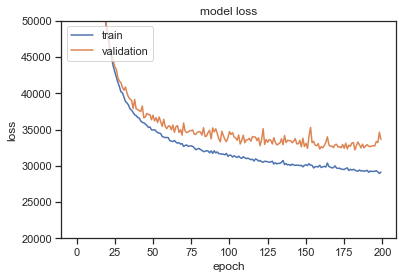

In [110]:
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim((20000,50000))
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Incluindo regularização

In [113]:
model_4 = Sequential()
model_4.add(Dense(128, input_dim=25, kernel_initializer='orthogonal', activation='relu'))
model_4.add(Dense(32, activation='relu', activity_regularizer =l1(0.001))) ##Melhorou um pouco com a regularização
model_4.add(Dense(3, activation='linear'))
model_4.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 128)               3328      
_________________________________________________________________
dense_37 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_38 (Dense)             (None, 3)                 99        
Total params: 7,555
Trainable params: 7,555
Non-trainable params: 0
_________________________________________________________________


In [114]:
model_4.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
history = model_4.fit(X_train, y_train, epochs=200, batch_size=16,  verbose=1, validation_split=0.2)
#,  callbacks=[callback])

Train on 3209 samples, validate on 803 samples
Epoch 1/200
3209/3209 [==============================] - 0s 139us/sample - loss: 12998781.7401 - mean_squared_error: 12998777.0000 - mean_absolute_error: 3485.3909 - val_loss: 12018859.4994 - val_mean_squared_error: 12018859.0000 - val_mean_absolute_error: 3342.6689
Epoch 2/200
3209/3209 [==============================] - 0s 71us/sample - loss: 8232128.3125 - mean_squared_error: 8232123.5000 - mean_absolute_error: 2688.7283 - val_loss: 4071619.5610 - val_mean_squared_error: 4071617.2500 - val_mean_absolute_error: 1810.8342
Epoch 3/200
3209/3209 [==============================] - 0s 70us/sample - loss: 2046056.7348 - mean_squared_error: 2046053.1250 - mean_absolute_error: 1190.0255 - val_loss: 1164364.6292 - val_mean_squared_error: 1164361.5000 - val_mean_absolute_error: 883.7067
Epoch 4/200
3209/3209 [==============================] - 0s 70us/sample - loss: 842364.9611 - mean_squared_error: 842361.5625 - mean_absolute_error: 729.2565 - val

Epoch 33/200
3209/3209 [==============================] - 0s 70us/sample - loss: 41320.5137 - mean_squared_error: 41316.9688 - mean_absolute_error: 150.6290 - val_loss: 42555.1588 - val_mean_squared_error: 42551.5859 - val_mean_absolute_error: 155.9214
Epoch 34/200
3209/3209 [==============================] - 0s 72us/sample - loss: 41329.0169 - mean_squared_error: 41325.4492 - mean_absolute_error: 149.9236 - val_loss: 41740.6701 - val_mean_squared_error: 41737.1094 - val_mean_absolute_error: 155.3325
Epoch 35/200
3209/3209 [==============================] - 0s 73us/sample - loss: 40760.1726 - mean_squared_error: 40756.6016 - mean_absolute_error: 149.5120 - val_loss: 41869.9073 - val_mean_squared_error: 41866.3594 - val_mean_absolute_error: 155.0943
Epoch 36/200
3209/3209 [==============================] - 0s 70us/sample - loss: 40338.6573 - mean_squared_error: 40335.0938 - mean_absolute_error: 147.8055 - val_loss: 40830.6508 - val_mean_squared_error: 40827.0898 - val_mean_absolute_erro

3209/3209 [==============================] - 0s 70us/sample - loss: 34873.2690 - mean_squared_error: 34869.7148 - mean_absolute_error: 134.8831 - val_loss: 36418.7849 - val_mean_squared_error: 36415.2266 - val_mean_absolute_error: 140.8586
Epoch 66/200
3209/3209 [==============================] - 0s 69us/sample - loss: 34829.6521 - mean_squared_error: 34826.1094 - mean_absolute_error: 134.2656 - val_loss: 36277.2568 - val_mean_squared_error: 36273.7070 - val_mean_absolute_error: 140.8361
Epoch 67/200
3209/3209 [==============================] - 0s 69us/sample - loss: 34863.9092 - mean_squared_error: 34860.3711 - mean_absolute_error: 134.3072 - val_loss: 36103.8316 - val_mean_squared_error: 36100.2852 - val_mean_absolute_error: 140.9074
Epoch 68/200
3209/3209 [==============================] - 0s 70us/sample - loss: 34689.0667 - mean_squared_error: 34685.5273 - mean_absolute_error: 134.1921 - val_loss: 35769.1236 - val_mean_squared_error: 35765.5703 - val_mean_absolute_error: 139.3763
E

3209/3209 [==============================] - 0s 69us/sample - loss: 32753.5400 - mean_squared_error: 32750.0059 - mean_absolute_error: 129.3402 - val_loss: 33871.2298 - val_mean_squared_error: 33867.6836 - val_mean_absolute_error: 134.6430
Epoch 98/200
3209/3209 [==============================] - 0s 71us/sample - loss: 32668.9621 - mean_squared_error: 32665.4375 - mean_absolute_error: 129.1442 - val_loss: 33781.8537 - val_mean_squared_error: 33778.3125 - val_mean_absolute_error: 135.0042
Epoch 99/200
3209/3209 [==============================] - 0s 72us/sample - loss: 32442.3678 - mean_squared_error: 32438.8340 - mean_absolute_error: 128.4798 - val_loss: 33949.6193 - val_mean_squared_error: 33946.0938 - val_mean_absolute_error: 135.2743
Epoch 100/200
3209/3209 [==============================] - 0s 69us/sample - loss: 32655.0128 - mean_squared_error: 32651.4805 - mean_absolute_error: 129.6444 - val_loss: 34229.0248 - val_mean_squared_error: 34225.4961 - val_mean_absolute_error: 135.8791


Epoch 129/200
3209/3209 [==============================] - 0s 69us/sample - loss: 31389.0817 - mean_squared_error: 31385.5527 - mean_absolute_error: 125.8894 - val_loss: 33016.6995 - val_mean_squared_error: 33013.1523 - val_mean_absolute_error: 132.4868
Epoch 130/200
3209/3209 [==============================] - 0s 70us/sample - loss: 31189.4287 - mean_squared_error: 31185.9023 - mean_absolute_error: 125.6696 - val_loss: 32980.9539 - val_mean_squared_error: 32977.4258 - val_mean_absolute_error: 132.8101
Epoch 131/200
3209/3209 [==============================] - 0s 70us/sample - loss: 31246.0946 - mean_squared_error: 31242.5625 - mean_absolute_error: 125.3116 - val_loss: 33429.0574 - val_mean_squared_error: 33425.5234 - val_mean_absolute_error: 134.2038
Epoch 132/200
3209/3209 [==============================] - 0s 71us/sample - loss: 31224.6461 - mean_squared_error: 31221.1172 - mean_absolute_error: 125.9629 - val_loss: 33160.4492 - val_mean_squared_error: 33156.9102 - val_mean_absolute_

3209/3209 [==============================] - 0s 75us/sample - loss: 30245.9456 - mean_squared_error: 30242.4102 - mean_absolute_error: 123.3125 - val_loss: 33315.9074 - val_mean_squared_error: 33312.3789 - val_mean_absolute_error: 134.3919
Epoch 162/200
3209/3209 [==============================] - 0s 72us/sample - loss: 30325.8597 - mean_squared_error: 30322.3281 - mean_absolute_error: 123.1685 - val_loss: 33124.7678 - val_mean_squared_error: 33121.2422 - val_mean_absolute_error: 133.8365
Epoch 163/200
3209/3209 [==============================] - 0s 70us/sample - loss: 30185.9091 - mean_squared_error: 30182.3789 - mean_absolute_error: 123.3168 - val_loss: 32714.4955 - val_mean_squared_error: 32710.9590 - val_mean_absolute_error: 132.3659
Epoch 164/200
3209/3209 [==============================] - 0s 70us/sample - loss: 30093.6015 - mean_squared_error: 30090.0723 - mean_absolute_error: 123.1314 - val_loss: 32813.3055 - val_mean_squared_error: 32809.7617 - val_mean_absolute_error: 132.687

3209/3209 [==============================] - 0s 70us/sample - loss: 29744.0989 - mean_squared_error: 29740.5605 - mean_absolute_error: 121.9557 - val_loss: 33531.0490 - val_mean_squared_error: 33527.5273 - val_mean_absolute_error: 135.0647
Epoch 194/200
3209/3209 [==============================] - 0s 71us/sample - loss: 29520.3318 - mean_squared_error: 29516.7988 - mean_absolute_error: 121.1954 - val_loss: 32460.8464 - val_mean_squared_error: 32457.3066 - val_mean_absolute_error: 131.7501
Epoch 195/200
3209/3209 [==============================] - 0s 75us/sample - loss: 29613.3509 - mean_squared_error: 29609.8066 - mean_absolute_error: 121.5564 - val_loss: 33275.0017 - val_mean_squared_error: 33271.4805 - val_mean_absolute_error: 134.2034
Epoch 196/200
3209/3209 [==============================] - 0s 70us/sample - loss: 29615.9882 - mean_squared_error: 29612.4492 - mean_absolute_error: 122.0008 - val_loss: 32402.5943 - val_mean_squared_error: 32399.0645 - val_mean_absolute_error: 132.705

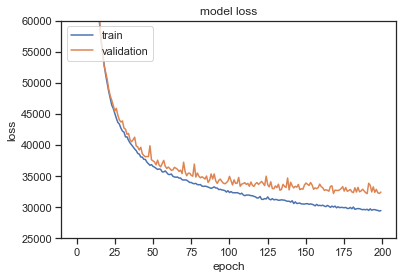

In [118]:
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim((25000,60000))
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [119]:
model_4.evaluate(X_test, y_test, batch_size=16)

1338/1338 [==============================] - 0s 36us/sample - loss: 33488.8024 - mean_squared_error: 33485.2656 - mean_absolute_error: 131.8241


[33488.802388417884, 33485.266, 131.8241]

In [120]:
y_pred = model_4.predict(X_test_std)
y_pred[10:20]

array([[5166.921 , 3214.4768, 4259.397 ],
       [4267.1777, 2470.4792, 3525.9055],
       [4650.175 , 2959.2654, 3846.0251],
       [4566.2593, 2548.8577, 3617.7764],
       [5418.53  , 3170.2764, 4393.9414],
       [5455.385 , 3552.903 , 4523.8545],
       [3590.0217, 1928.5345, 2571.011 ],
       [6573.2217, 4138.688 , 5372.8154],
       [4723.045 , 3040.8254, 3924.2847],
       [4087.8147, 2421.5657, 3104.2659]], dtype=float32)

In [121]:
y_test_std[10:20]

,Demanda_Max,Demanda_Min,Demanda_Med
3260,5296.0,3211.0,4334.384028
3595,4371.0,2467.0,3544.848611
2217,4957.0,3301.0,4173.518750
5225,4698.0,2568.0,3581.936111
3244,5563.0,3306.0,4522.844444
3302,5647.0,3471.0,4628.973611
3584,3377.0,1782.0,2431.307639
2955,6476.0,3949.0,5214.668056
731,4248.0,2542.0,3480.706944
4626,4170.0,2472.0,3241.348611


**Avaliação do modelo 3 demandas juntas**

In [122]:
print('MAE:',mean_absolute_error(y_test, y_pred))
MSE = mean_squared_error(y_test, y_pred)
print('RMSE:',np.sqrt(MSE))
print('MSE log error:', mean_squared_log_error(y_test, y_pred))
R2 = r2_score(y_test, y_pred)
print('R2 Score:', R2)
n= len(X_train)
p = len(X_train.columns)
print('Adj R2 Score', 1-(1-R2)*(n-1)/(n-p-1))

MAE: 131.82409370063093
RMSE: 182.9897995105386
MSE log error: 0.003049192594333058
R2 Score: 0.8915282316746639
Adj R2 Score 0.8908479019686595


**Avaliação do modelo demanda máxima**

In [123]:
#Demanda Máxima
print('MAE:',mean_absolute_error(y_test['Demanda_Max'], y_pred[:,0]))
MSE = mean_squared_error(y_test['Demanda_Max'], y_pred[:,0])
print('RMSE:',np.sqrt(MSE))
R2 = r2_score(y_test['Demanda_Max'], y_pred[:,0])
print('R2 Score:', R2)
n= len(X_train)
p = len(X_train.columns)
print('Adj R2 Score', 1-(1-R2)*(n-1)/(n-p-1))
print('Variance Score:', explained_variance_score(y_test['Demanda_Max'], y_pred[:,0]))

MAE: 138.14010496952073
RMSE: 190.3153540368933
R2 Score: 0.8995248768851889
Adj R2 Score 0.8988947017527578
Variance Score: 0.8995315475897727


**Avaliação do modelo demanda média**

In [124]:
#Demanda Média
print('MAE:',mean_absolute_error(y_test['Demanda_Med'], y_pred[:,2]))
MSE = mean_squared_error(y_test['Demanda_Med'], y_pred[:,2])
print('RMSE:',np.sqrt(MSE))
R2 = r2_score(y_test['Demanda_Med'], y_pred[:,2])
print('R2 Score:', R2)
n= len(X_train)
p = len(X_train.columns)
print('Adj R2 Score', 1-(1-R2)*(n-1)/(n-p-1))
print('Variance Score:', explained_variance_score(y_test['Demanda_Med'], y_pred[:,2]))

MAE: 119.48763924414692
RMSE: 168.1103745627617
R2 Score: 0.9223288400368673
Adj R2 Score 0.9218416902628888
Variance Score: 0.9223619328367603


**Avaliação do modelo demanda mínima**

In [125]:
#Demanda Mínima
print('MAE:',mean_absolute_error(y_test['Demanda_Min'], y_pred[:,1]))
MSE = mean_squared_error(y_test['Demanda_Min'], y_pred[:,1])
print('RMSE:',np.sqrt(MSE))
R2 = r2_score(y_test['Demanda_Min'], y_pred[:,1])
print('R2 Score:', R2)
n= len(X_train)
p = len(X_train.columns)
print('Adj R2 Score', 1-(1-R2)*(n-1)/(n-p-1))
print('Variance Score:', explained_variance_score(y_test['Demanda_Min'], y_pred[:,1]))

MAE: 137.8445368882252
RMSE: 189.6701562104624
R2 Score: 0.8527309781019358
Adj R2 Score 0.8518073138903323
Variance Score: 0.8527947876550308
